In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")

import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = []
for file in os.listdir('Data_old'):
        with open('Data_old/'+file, mode='r') as tf:
            datain = np.genfromtxt(tf,delimiter="\t",skip_header=15).T
            data.append([file.split('.')[0],datain[0],datain[1],np.sqrt(datain[1])])

[array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.045e+03, 2.046e+03,
       2.047e+03]), array([2., 6., 3., ..., 0., 0., 0.])]


/home/friedrichjahns/BScPhysik/Semester 7/Fortgeschrittenen-Praktikum-Physik/FP7_Rutherford/FP7_lib/functions.py:28: RuntimeWarning: divide by zero encountered in true_divide
  out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 1200
    # variables        = 3
    chi-square         = inf
    reduced chi-square = inf
    Akaike info crit   = inf
    Bayesian info crit = inf
##  Warning: uncertainties could not be estimated:
    amplitude:  at initial value
    center:     at initial value
    sigma:      at initial value
[[Variables]]
    amplitude:  25042.5000 (init = 25042.5)
    center:     685.608209 (init = 685.6082)
    sigma:      185.500000 (init = 185.5)
    fwhm:       436.819110 == '2.3548200*sigma'
    height:     53.8572105 == '0.3989423*amplitude/max(1e-15, sigma)'


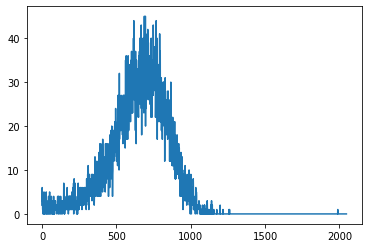

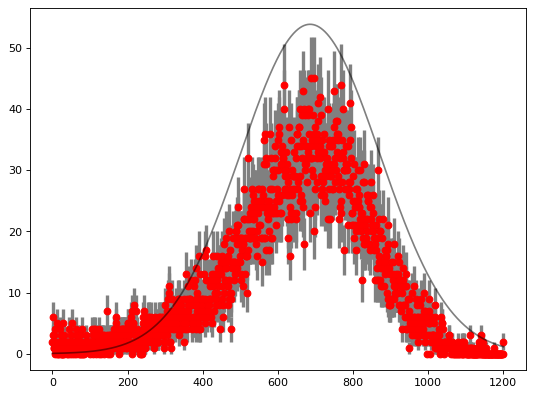

In [3]:
for i in data:
    if i[0] == '500Torr':
        plt.plot(i[1],i[2])
        print(i[1:3])
        f.gaus1fit(i,0,1200,'test')

In [4]:
f.gaus1fit()

TypeError: gaus1fit() missing 4 required positional arguments: 'dat', 'von', 'bis', and 'path'